In [152]:
import pandas as pd
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

plt.style.use('./deeplearning.mplstyle')
RANDOM_STATE = 55

In [153]:
df = pd.read_csv("sample_malicious_url.csv")
# df.head()

In [154]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])
print(label_encoder.classes_)

['benign' 'defacement' 'malware' 'phishing']


In [155]:
# Exclude the target column
features = [x for x in df.columns if x != 'type']  # Exclude 'type' column
print(len(features))

7


In [156]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size=0.3, random_state=42)

print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 700
validation samples: 300
target proportion: 1.4957


In [157]:
# Building random forest tree 
# min_samples_split: The minimum number of samples required to split an internal ndoe
# max_depth: The maximum depth of the tree
# An additionaly hyperparameter for Random Forest is called n_estimators, which is the 
# number of Decision Tress that make up the Random Forest

min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

min_samples_split=2, Train Accuracy=0.9929, Validation Accuracy=0.7900
min_samples_split=10, Train Accuracy=0.9143, Validation Accuracy=0.7833
min_samples_split=30, Train Accuracy=0.8243, Validation Accuracy=0.7433
min_samples_split=50, Train Accuracy=0.7771, Validation Accuracy=0.7033
min_samples_split=100, Train Accuracy=0.7214, Validation Accuracy=0.6767
min_samples_split=200, Train Accuracy=0.6657, Validation Accuracy=0.6700
min_samples_split=300, Train Accuracy=0.6029, Validation Accuracy=0.5933
min_samples_split=700, Train Accuracy=0.2543, Validation Accuracy=0.2400


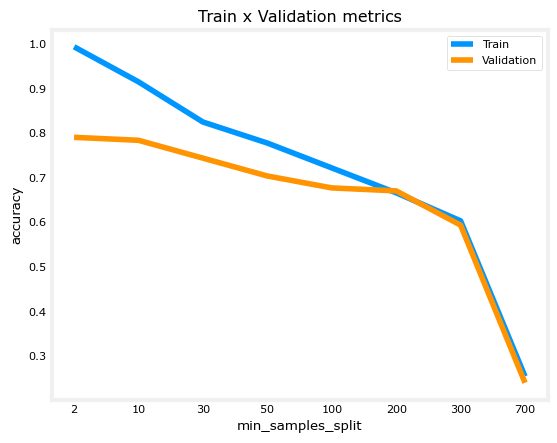

In [158]:
# Min Samples Split

accuracy_list_train = []
accuracy_list_val = []

for min_samples_split in min_samples_split_list:

    model = RandomForestClassifier(min_samples_split=min_samples_split,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"min_samples_split={min_samples_split}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks= range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train', 'Validation'])

max_depth=1, Train Accuracy=0.5829, Validation Accuracy=0.5733
max_depth=2, Train Accuracy=0.6629, Validation Accuracy=0.6467
max_depth=3, Train Accuracy=0.7157, Validation Accuracy=0.6767
max_depth=4, Train Accuracy=0.7614, Validation Accuracy=0.6800
max_depth=8, Train Accuracy=0.9329, Validation Accuracy=0.7767
max_depth=16, Train Accuracy=0.9929, Validation Accuracy=0.7833
max_depth=32, Train Accuracy=0.9929, Validation Accuracy=0.7900
max_depth=64, Train Accuracy=0.9929, Validation Accuracy=0.7900
max_depth=None, Train Accuracy=0.9929, Validation Accuracy=0.7900


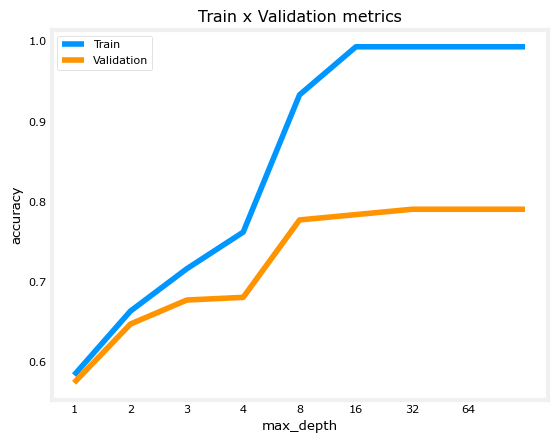

In [159]:
# Max depth

accuracy_list_train = []
accuracy_list_val = []

for max_depth in max_depth_list:

    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"max_depth={max_depth}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)

plt.legend(['Train','Validation'])

n_estimators=10, Train Accuracy=0.9814, Validation Accuracy=0.7700
n_estimators=50, Train Accuracy=0.9914, Validation Accuracy=0.7833
n_estimators=100, Train Accuracy=0.9929, Validation Accuracy=0.7900
n_estimators=500, Train Accuracy=0.9929, Validation Accuracy=0.7900


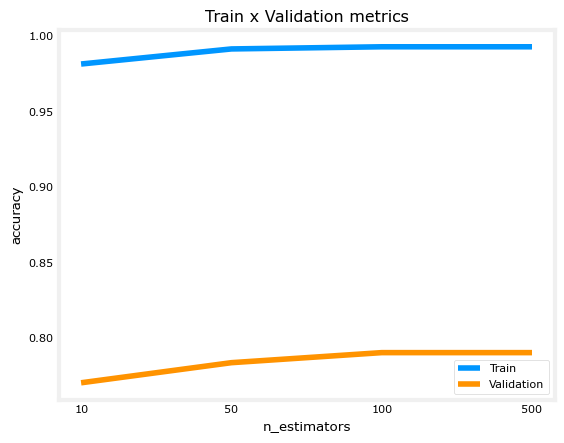

In [160]:
# N Estimators

accuracy_list_train = []
accuracy_list_val = []

for n_estimators in n_estimators_list:

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_STATE).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_val = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

    print(f"n_estimators={n_estimators}, Train Accuracy={accuracy_train:.4f}, Validation Accuracy={accuracy_val:.4f}")

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [161]:
random_forest_model = RandomForestClassifier(n_estimators = 50,
                                             max_depth = 8, 
                                             min_samples_split = 10).fit(X_train,y_train)

In [162]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.8843
Metrics test:
	Accuracy score: 0.7933


In [163]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [164]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [165]:
# eval_set = [(X_train_eval,y_train_eval)]:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets.
# early_stopping_rounds: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.

# This code builds and trains a smart model to make predictions, and it tries to avoid overfitting by stopping early if the model stops improving.
# xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds = 15)
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-mlogloss:1.29446
[1]	validation_0-mlogloss:1.21804
[2]	validation_0-mlogloss:1.15222
[3]	validation_0-mlogloss:1.09502
[4]	validation_0-mlogloss:1.04490
[5]	validation_0-mlogloss:1.00471
[6]	validation_0-mlogloss:0.96576
[7]	validation_0-mlogloss:0.93097
[8]	validation_0-mlogloss:0.90219
[9]	validation_0-mlogloss:0.87529
[10]	validation_0-mlogloss:0.84902
[11]	validation_0-mlogloss:0.82922
[12]	validation_0-mlogloss:0.80840
[13]	validation_0-mlogloss:0.79213
[14]	validation_0-mlogloss:0.77938
[15]	validation_0-mlogloss:0.76482
[16]	validation_0-mlogloss:0.75255
[17]	validation_0-mlogloss:0.74012
[18]	validation_0-mlogloss:0.72880
[19]	validation_0-mlogloss:0.71929
[20]	validation_0-mlogloss:0.70985
[21]	validation_0-mlogloss:0.70278
[22]	validation_0-mlogloss:0.69641
[23]	validation_0-mlogloss:0.68955
[24]	validation_0-mlogloss:0.68301
[25]	validation_0-mlogloss:0.67753
[26]	validation_0-mlogloss:0.67268
[27]	validation_0-mlogloss:0.66843
[28]	validation_0-mlogloss:0.6

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [166]:
# xgb_model.best_iteration

In [167]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9529
Metrics test:
	Accuracy score: 0.7600


In [168]:
# These are the number of times the model correctly predicted the class for each actual class.
# Correct Predictions (diagonal elements)
# Class 0 is predicted very accurately (138 correct, only 3 misclassifications as Class 1).
# Class 1 has some misclassifications (5 as Class 0 and 2 as Class 3), but overall, it has a strong performance (36 correct).
# Class 2 seems to be harder for the model to predict correctly, with several misclassifications into other classes (particularly Classes 0 and 1).
# Class 3 also has misclassifications, but it is predicted correctly 6 times, while 3 instances are misclassified as Class 1.

cm = confusion_matrix(y_test, xgb_model.predict(X_test))
print(cm)

[[59  1  4  8]
 [ 2 58  9  9]
 [ 2  3 67  3]
 [14 11  6 44]]


In [169]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        72
           1       0.79      0.74      0.77        78
           2       0.78      0.89      0.83        75
           3       0.69      0.59      0.63        75

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [170]:
cv_score = cross_val_score(xgb_model, X_test, y_test, cv=5)
print(f'Cross-Validation Score: {cv_score}')
print(f'Mean CV Score: {cv_score.mean()}')

Cross-Validation Score: [0.73333333 0.66666667 0.73333333 0.68333333 0.85      ]
Mean CV Score: 0.7333333333333333


                   Feature    Importance
2                num_digit  1.940000e-01
4              path_length  1.693333e-01
0               url_length  1.346667e-01
5        num_path_segments  1.060000e-01
3           num_subdomains  7.133333e-02
1        num_special_chars  6.400000e-02
6  num_suspicious_keywords  2.220446e-17


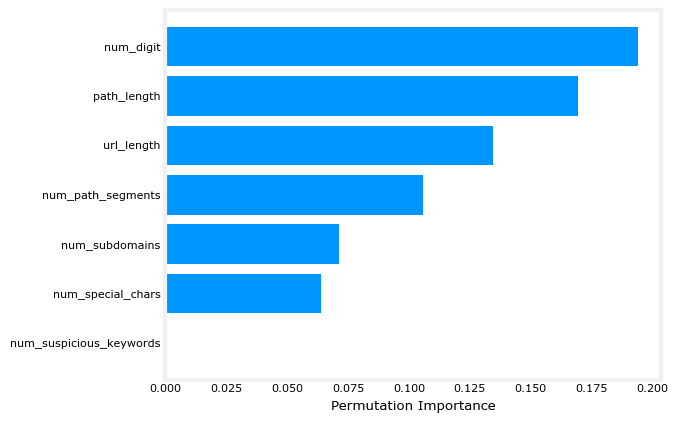

In [171]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, scoring="accuracy")

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [172]:
def extract_features(url):
    feature = {}
    feature['url_length'] = len(url)
    feature['num_special_chars'] = sum(1 for c in url if c in ['?', '=', '&', '%', '@', '-', '_'])
    feature['num_digit'] = sum(c.isdigit() for c in url)
    feature['num_subdomains'] = url.count('.')
    parsed_url = urlparse(url)
    feature['path_length'] = len(parsed_url.path)
    feature['num_path_segments'] = parsed_url.path.count('/')
    suspicious_keywords = ['pay', '.io', 'login', 'secure', 'wallet', 'auth', 'support', 'block']
    feature['num_suspicious_keywords'] = sum(1 for keyword in suspicious_keywords if keyword in url)
    return feature

In [ ]:
url = "https://eezxodullgeunn.webflow.io" # phishing
url3 = "https://www.exeter.ac.uk/study/graduate-scheme/" # Supposedly safe

new_features = extract_features(url3)

new_features_df = pd.DataFrame([new_features])

prediction = random_forest_model.predict(new_features_df)

predicted_class = label_encoder.inverse_transform(prediction)

# Output the prediction
# print(f"Prediction for URL '{url3}': {prediction[0]}")
print(f"Prediction for URL '{url3}': {predicted_class[0]}")

Prediction for URL 'https://www.exeter.ac.uk/study/graduate-scheme/': defacement
